In [ ]:
import numpy as np
import random
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [ ]:
import tensorflow 
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
json_file = open('/content/drive/MyDrive/aug_coloured_dataset/model_v1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/aug_coloured_dataset/model.h5")
print("Loaded model from disk")
 


Loaded model from disk


In [ ]:
# evaluate loaded model on test data
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
#score = model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (  model.metrics_names[1], score[1]*100))

In [ ]:
layer_outputs =[layer.output for layer in model.layers[1:]]

In [ ]:
visualize_model = keras.models.Model(inputs = model.input, outputs=layer_outputs)

In [ ]:
img = load_img('/content/drive/MyDrive/aug_coloured_dataset/test/bananas/2017-11-26-02-42-29.jpg',target_size=(128,128))

In [ ]:
x = img_to_array(img)

In [ ]:
x.shape

(128, 128, 3)

In [ ]:
x=x.reshape((1,128,128,3))
x.shape

(1, 128, 128, 3)

In [ ]:
x=x/255

In [ ]:
feature_maps = visualize_model.predict(x)

In [ ]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d_12', 'conv2d_13', 'max_pooling2d_4', 'dropout_6', 'conv2d_14', 'conv2d_15', 'max_pooling2d_5', 'dropout_7', 'conv2d_16', 'conv2d_17', 'global_average_pooling2d_2', 'dense_4', 'dropout_8', 'dense_5']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 16, 16, 64)
(1, 16, 16, 64)
(1, 8, 8, 64)
(1, 8, 8, 64)
(1, 8, 8, 128)
(1, 8, 8, 128)
(1, 128)
(1, 512)
(1, 512)
(1, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


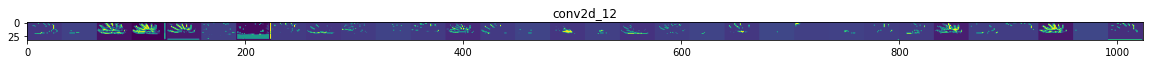

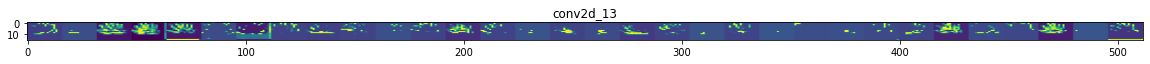

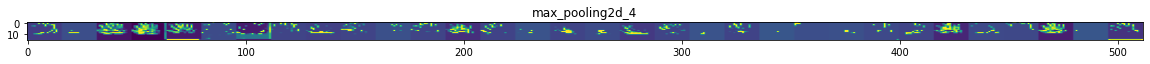

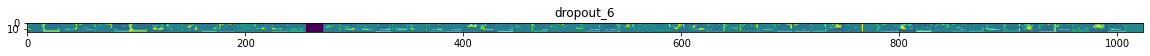

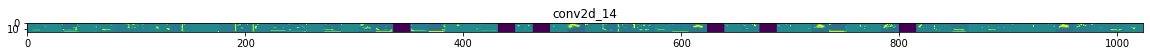

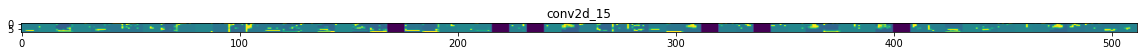

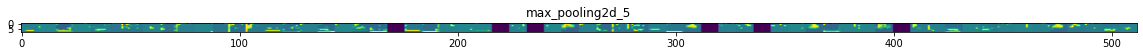

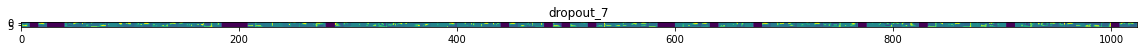

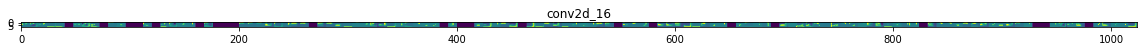

In [ ]:

# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect=0.5, cmap='viridis')


In [ ]:
filters = model.layers[2].get_weights()

conv2d_12
32


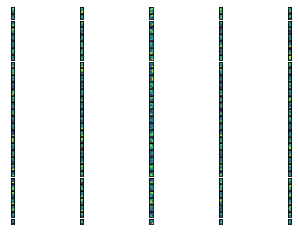

conv2d_13
32


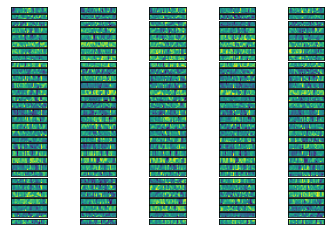

conv2d_14
64


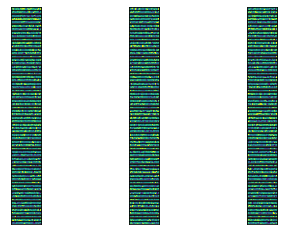

conv2d_15
64


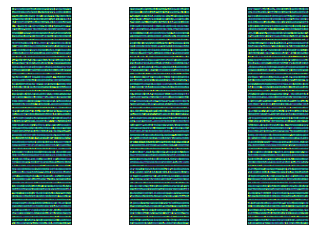

conv2d_16
128


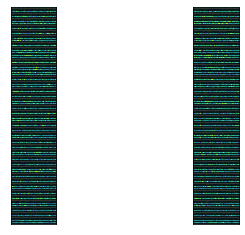

conv2d_17
128


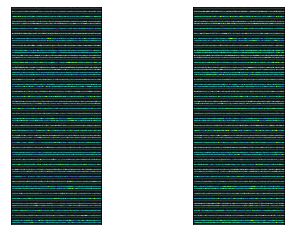

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

(1, 32, 32, 32)


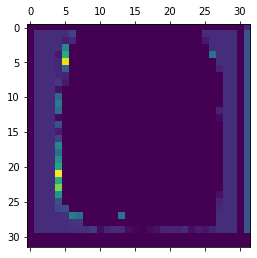

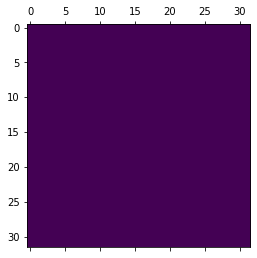

In [ ]:

  
# Getting Activations of first layer
first_layer_activation = feature_maps[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

(1, 16, 16, 64)


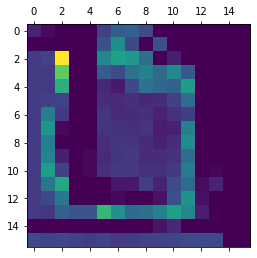

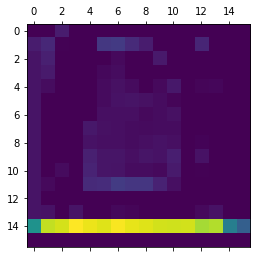

In [ ]:

third_layer_activation = feature_maps[3]
  
# shape of first layer activation
print(third_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(third_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(third_layer_activation[0, :, :, 15], cmap ='viridis')